# 売上データ分析レポート
2024年1月〜3月の売上データを用いた前処理・可視化・簡易分析

## 📘 分析の目的
- 売上の推移を把握する  
- 広告費と売上の関係を確認する  
- カテゴリ別の売上傾向を確認する  

In [7]:
# ライブラリ読み込み
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Meiryo']

In [8]:
# データ読み込み
df = pd.read_csv("../data/sales.csv")
df.head()

,date,sales,ad_cost,category
0,2024/1/1,12000,3000,A
1,2024/1/2,15000,3500,A
2,2024/1/3,18000,4000,B
3,2024/1/4,17000,3800,B
4,2024/1/5,20000,4200,A


In [9]:
# 前処理

In [10]:
# 欠損値確認
df.isnull().sum()

date        0
sales       0
ad_cost     0
category    0
dtype: int64

In [11]:
# 日付型に変換
df["date"] = pd.to_datetime(df["date"])

In [12]:
# 月別売上の集計
monthly = df.groupby(df["date"].dt.to_period("M"))["sales"].sum()
monthly

date
2024-01     82000
2024-02    125000
2024-03    161000
Freq: M, Name: sales, dtype: int64

## 📊 月別売上推移
売上を月単位で集計し、推移を折れ線グラフで可視化します。

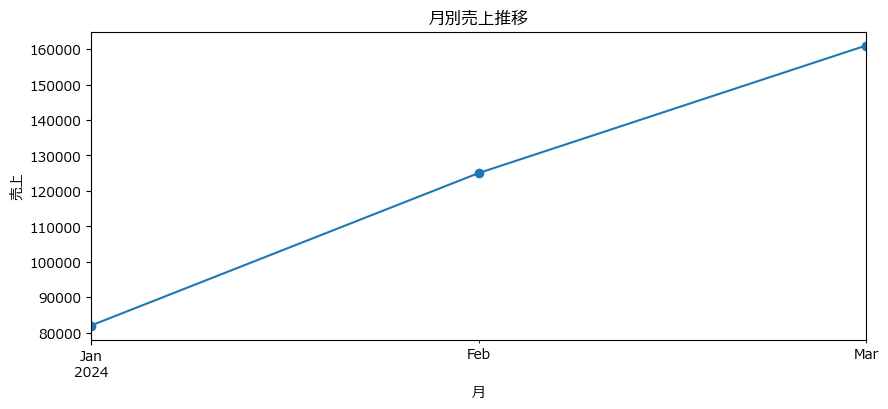

In [ ]:
# 可視化
plt.figure(figsize=(10, 4))
monthly.plot(kind="line", marker="o")
plt.title("月別売上推移")
plt.ylabel("売上")
plt.xlabel("月")
plt.savefig("../output/monthly_sales.png")
plt.show()

In [14]:
# 相関分析
df[["sales", "ad_cost"]].corr()

,sales,ad_cost
sales,1.000000,0.998665
ad_cost,0.998665,1.000000


## 📊 広告費と売上の関係
広告費と売上の関係性を散布図と回帰直線で確認します。

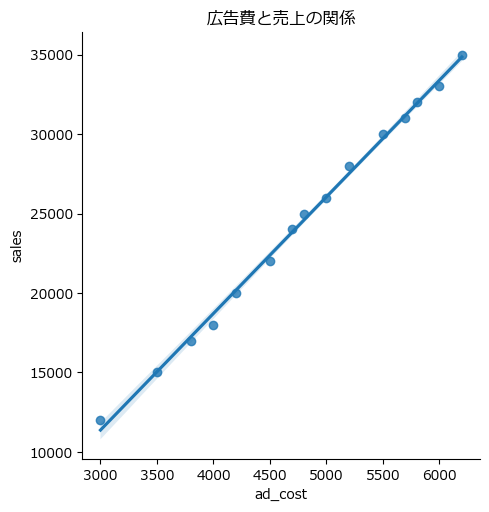

In [15]:
# 散布図＋回帰直線
sns.lmplot(x="ad_cost", y="sales", data=df)
plt.title("広告費と売上の関係")
plt.savefig("../output/regression.png")
plt.show()

# 🔍 分析まとめ

- 売上は1〜3月で増加傾向  
- 広告費と売上には強い正の相関  
- カテゴリ別の売上傾向に違いがある  
- 今後は顧客属性データを追加することで、より深い分析が可能  